In [4]:
import pandas as pd

df= pd.read_csv("titanic.csv")

In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df.drop(columns=["Embarked"],inplace=True)
df.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708


In [9]:
targets= df.Survived
inputs= df.drop('Survived',axis=1)

dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,False,True
1,True,False
2,True,False


In [11]:
inputs= pd.concat([inputs,dummies],axis=1)
inputs.drop(columns='Sex',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female,male,female,male
0,3,22.0,7.2500,False,True,False,True
1,1,38.0,71.2833,True,False,True,False
2,3,26.0,7.9250,True,False,True,False


In [13]:
inputs = inputs.iloc[:, :-2]

In [14]:
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False


In [15]:
inputs.Age.fillna(inputs.Age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [20]:
df.dropna(inplace=True)

In [21]:
df.drop_duplicates(inplace=True)

In [28]:
import sklearn

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(inputs,targets,test_size=0.2)

In [36]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')


X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)


# Create and fit Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [37]:
model.score(X_test,y_test)

0.7821229050279329

In [57]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

In [58]:
y_pred = model.predict(X_test)

y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [63]:
y_test.shape

(1, 179)

In [64]:
y_pred.shape

(179,)

In [65]:
y_test_reshaped = y_test.reshape(-1,)

# Now calculate accuracy score
acc = accuracy_score(y_pred, y_test_reshaped)

In [66]:
acc

0.7821229050279329

<Axes: >

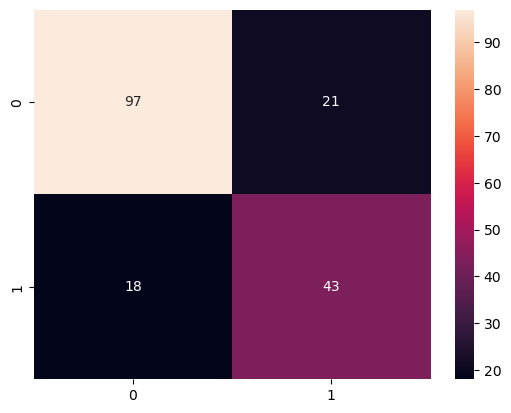

In [71]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_pred,y_test_reshaped),annot=True)

In [73]:
print(classification_report(y_pred,y_test_reshaped))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       118
           1       0.67      0.70      0.69        61

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

